## Nombre y apellidos

**Nombre:**

**Apellidos:**

### Cambiar el nombre del notebook a *Entrega2_ApellidosNombre.ipynb*

## -->*Importante comentar el código* <--

In [2]:
import zipfile as zp # para descomprimir archivos zip
import urllib.request # para descargar de URL
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ejercicio 1: Police Dataset

**Carga el csv con los datos de la policía, y obtén la siguiente información:**

- 1. ¿Cuáles fue el delito más común en 2005? ¿Y los dos delitos más comunes en 2012?
- 2. ¿Cuál ha sido el delito más común cada año desde que tenemos estadísticas?
- 3. ¿Cuál fue el mes de 2008 con más delitos?
- 4. ¿Cuáles fueron los dos delitos más comunes en 2012?
- 5. ¿Las infracciones Speeding y Equipment son más comunes entre hombres o mujeres? Explica tu respuesta
- 6. Obtén la media de la edad de los infractores por tipo de delito
- 7. ¿Cuál es el delito por el que es más común ser arrestado?
- 8. Plotea el gráfico que consideres más adecuado para analizar los diferentes delitos cometidos por hombres y mujeres.
- 9. Plotea en el gráfico que consideres más apropiado la proporción (porcentaje) de cada tipo de delito (un gráfico por cada año)
- 10. Plotea el gráfico que consideres más adecuado para ver la evolución en el tiempo del número de delitos de Speeding, Moving violation y Equipment

In [3]:
police = pd.read_csv('../datasets/police.csv')#Multas
police.head()
#police.driver_race.unique()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
#1 ¿Cuáles fue el delito más común en 2005? ¿Y los dos delitos más comunes en 2012?
A = police[police["stop_date"].str.contains("2005")].groupby('violation_raw').size().sort_values(ascending=False).head(1) # Filtrar por año (2005), agrupar por delito y sacar el valor más alto
B = police[police["stop_date"].str.contains("2012")].groupby('violation_raw').size().sort_values(ascending=False).head(2) # Filtrar por año (2012), agrupar por delito y sacar los dos valores más altos
print(A)
print(B)

In [6]:
#2 ¿Cuál ha sido el delito más común cada año desde que tenemos estadísticas?
year = police['stop_date'].str.split("/").str[2] # Sacar los años de la columna 'stop_date'
police.groupby([year, "violation_raw"])['violation_raw'].value_counts() # Agrupar por año y sacar cuanto sale cada delito cada año


stop_date  violation_raw                     violation_raw                   
2005       APB                               APB                                    5
           Call for Service                  Call for Service                      26
           Equipment/Inspection Violation    Equipment/Inspection Violation       170
           Motorist Assist/Courtesy          Motorist Assist/Courtesy              18
           Other Traffic Violation           Other Traffic Violation              384
                                                                                 ... 
2012       Seatbelt Violation                Seatbelt Violation                     3
           Special Detail/Directed Patrol    Special Detail/Directed Patrol       330
           Speeding                          Speeding                            4174
           Suspicious Person                 Suspicious Person                      6
           Violation of City/Town Ordinance  Violation of City

In [7]:
#3 ¿Cuál fue el mes de 2008 con más delitos?

month = police['stop_date'].str.split("/").str[0] # Sacar los meses de la columna 'stop_date'
A = police[police["stop_date"].str.contains("2008")].groupby(month).size().sort_values(ascending=False).head(1) # Filtrar por año (2008), agrupar por mes y sacar el mes con más delitos
A

stop_date
1    831
dtype: int64

In [ ]:
# 4 ¿Cuáles fueron los dos delitos más comunes en 2012?
A = police[police["stop_date"].str.contains("2012")].groupby('violation_raw').size().sort_values(ascending=False).head(2) # Filtrar por año (2012), agrupar por delito y sacar los delitos que salen más veces
A

In [ ]:
#5 ¿Las infracciones Speeding y Equipment son más comunes entre hombres o mujeres? Explica tu respuesta
speeding = police[(police["violation_raw"] == "Speeding") | (police["violation_raw"] == "Equipment/Inspection Violation")] # Filtrar los delitos que son Speeding, Equipment
gender = speeding.groupby("driver_gender").size() # Agrupar por género
gender # Los hombres participan en más delitos que las mujeres

In [ ]:
#6 Obtén la media de la edad de los infractores por tipo de delito
police.groupby('violation_raw').mean()['driver_age'] # Agrupar por delito y sacar la media de edad de cada delito

In [ ]:
#7 ¿Cuál es el delito por el que es más común ser arrestado?
police_arrested = police[police['is_arrested'] == True] # Filtrar por los delitos en los que se arresta
police_arrested.groupby('violation_raw').size().sort_values(ascending=False).head(1) # Agrupar por delito y sacar el delito que más sale

<AxesSubplot:xlabel='driver_gender,violation_raw'>

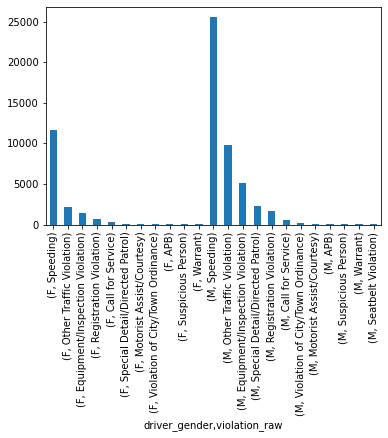

In [5]:
#8 Plotea el gráfico que consideres más adecuado para analizar los diferentes delitos cometidos por hombres y mujeres.
police.groupby('driver_gender')['violation_raw'].value_counts().plot(kind = "bar", stacked= True) # Agrupar por génerp y sacar un gráfico de barras (No lo stackea)



array([<AxesSubplot:ylabel='None'>], dtype=object)

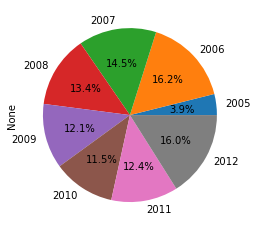

In [8]:
#9 Plotea en el gráfico que consideres más apropiado la proporción (porcentaje) de cada tipo de delito (un gráfico por cada año)
year = police['stop_date'].str.split("/").str[2] # Sacar los años de la columna 'stop_date'
police.groupby(year).size().plot(kind='pie', subplots=True, autopct='%1.1f%%') # Agrupar por año y sacar los delitos (No hace subplots)

In [7]:
#10 Plotea el gráfico que consideres más adecuado para ver la evolución en el tiempo del número de delitos de Speeding, Moving violation y Equipment
year = police['stop_date'].str.split("/").str[2]
policeD = police[(police["violation"] == "Speeding") | (police["violation"] == "Equipment") | (police["violation"] == "Moving violation")]
policeD.groupby(year)

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

### Ejercicio 2: Covid Dataset

**Carga el csv con los datos covid, y obtén la siguiente información:**

- 1. ¿Cúal es la región con más casos confirmados?¿y con menos?
- 2. ¿Cuál es la región con mayor proporción de muertos con respecto a casos confirmados?
- 3. Plotea una figura con tres gráficos para estudiar la evolución en el tiempo de casos confirmados, muertos y recuperados por país en los siguientes países: España, Italia y Alemania. Tiene que haber un gráfico por país. 

In [10]:
covid = pd.read_csv('../datasets/covid19.csv')#Multas
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [10]:
#1 ¿Cúal es la región con más casos confirmados?¿y con menos?
A =covid.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(1) # Agrupar por Region ,sacar la suma de los casos confirmados y mostrar el más alto
B =covid.groupby('Region')['Confirmed'].sum().sort_values(ascending = True).head(1) # Agrupar por Region ,sacar la suma de los casos confirmados y mostrar el más bajo
print(A)
print(B)


Region
US    1039909
Name: Confirmed, dtype: int64
Region
Yemen    6
Name: Confirmed, dtype: int64


In [11]:
#2 ¿Cuál es la región con mayor proporción de muertos con respecto a casos confirmados?

covid2 = covid
covid2.groupby('Region').mean() # Agrupar por region y sacar la media
covid2['proporcion'] = covid2['Deaths']/covid2['Confirmed'] # Calcular el campo proporcion = muertes / confirmados
covid2 = covid2[covid['proporcion'] != np.inf] # Eliminar campos np.inf
covid2.sort_values('proporcion', ascending= False).head(1) # Sacar la region con mayor proporcion

,Date,State,Region,Confirmed,Deaths,Recovered,proporcion
118,4/29/2020,NaN,Nicaragua,13,3,7,0.230769


array([<AxesSubplot:title={'center':'Confirmed'}, xlabel='Region'>,
       <AxesSubplot:title={'center':'Deaths'}, xlabel='Region'>,
       <AxesSubplot:title={'center':'Recovered'}, xlabel='Region'>],
      dtype=object)

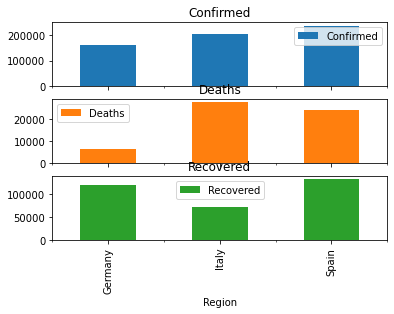

In [12]:
#3 Plotea una figura con tres gráficos para estudiar los casos confirmados, muertos y recuperados por país 
#  en los siguientes países: España, Italia y Alemania. Tiene que haber un gráfico por país.

covidP = covid[(covid["Region"] == "Spain") | (covid["Region"] == "Italy") | (covid["Region"] == "Germany")] #Filtrar las regiones que son Spin, Italy o Germany
covidP.plot(kind = 'bar', x = 'Region', y = ['Confirmed', 'Deaths', 'Recovered'], subplots=True) # Hacer un gráfico de barras que muestra los casos confirmados, muertes y recuperados por region


### Ejercicio 3: MovieLens Dataset

**Carga el csv con los datos de MovieLens y completa las tareas que se piden:**


In [13]:
# descargar del dataset MovieLens 
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'  
local_zip = os.path.join("../datasets", "ml-1m.zip")
urllib.request.urlretrieve(url, local_zip)
# para descomprimir un archivo zip
with zp.ZipFile(local_zip, 'r') as zipp: 
    print('Extracting all files...') 
    zipp.extractall(os.path.join("datasets")) # donde se guarda
    print('Done!') 

Extracting all files...
Done!


In [13]:
root_path = os.path.join("datasets", "ml-1m" )

ratings = pd.read_csv(os.path.join(root_path, "ratings.dat"), sep='::',
                                index_col=0, engine='python',
                                names=['UserID','MovieID','Rating','Timestamp'])

users = pd.read_csv(os.path.join(root_path, "users.dat"),sep='::',
                              index_col=0, engine='python',
                              names=['UserID','Gender','Age','Occupation','Zip-code'])

In [ ]:
ratings

In [ ]:
users

#### 3.1. Combina los datasets de ratings y users, en un dataset llamado all_dataset, cruzando por una columna común y comprueba que se ha hecho bien el cruce. Con ese dataset crea una pivot table a partir de la tabla Ratings para calcular la media y el total de ratings por  y género y ocupación

¿merge, join, concat? ¿left,right, inner?

In [ ]:
all_dataset = pd.merge(ratings, users, left_index=True, right_index = True)
all_dataset

#### Pivot Tables
- Representar los datos en función a varios parámetros, agregando
```python
pivot_table(<lista de valores>, index=<agregador primario>, columns=<agregador secundario>)
```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Ejemplo:

In [ ]:
all_dataset.pivot_table('Rating', index='Gender', columns='Age', aggfunc='count')

In [16]:
all_dataset.pivot_table('Rating', index='Occupation', columns='Gender', aggfunc='count').sum()

Gender
F    246440
M    753769
dtype: int64

In [17]:
all_dataset.pivot_table('Rating', index='Occupation', columns='Gender', aggfunc='count').mean()

Gender
F    11735.238095
M    35893.761905
dtype: float64

#### 3.2. Dado el dataset de géneros únelo con el dataset original (movies) encuentra:

- Comedias de 1975
- Películas del oeste de 1980
- Género del que se produjeron más películas a lo largo de cada uno de los años de la década de los 80s

In [14]:
movies = pd.read_csv(os.path.join(root_path, "movies.dat"),sep='::', engine='python',names=['MovieID','Title','Genre'])
movies

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [21]:
all_genres = movies['Genre'].apply(lambda x : x.split('|'))
print(all_genres)

# print([genre for x in all_genres for genre in x])

genres = pd.unique([genre for x in all_genres for genre in x])
print(genres)

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genre, Length: 3883, dtype: object
['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [22]:
# crear tabla con columnas por género
zeros = np.zeros( (len(movies), len(genres)) )
genres_frame = pd.DataFrame(zeros, columns=genres)


columns_genres = genres_frame.columns # lista de generos (columnas)
# para cada película, marcar género con 1
for i, genre in enumerate(movies['Genre']):
    inds = columns_genres.get_indexer(genre.split('|')) # retorna los indices correspondientes a los generos de cada pelicula
    genres_frame.iloc[i,inds] = 1 # localiza las columnas del genero correspondiente, marca con 1
genres_frame

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#1 Comedias de 1975

movies75 = movies.loc[movies['Title'].str.contains("1975")].loc[movies['Genre'].str.contains('Comedy')] # Filtrar las peliculas de 1975 y de Comedia
movies75

In [ ]:
#2 Películas del oeste de 1980
movies80W = movies.loc[movies['Title'].str.contains("1980")].loc[movies['Genre'].str.contains('Western')] # Filtrar las peliculas de 1980 y del Oeste
movies80W

In [27]:
#3 Género del que se produjeron más películas a lo largo de cada uno de los años de la década de los 80s
moviesG = pd.merge(movies.loc[movies['Title'].str.contains("198", case=False)], genres_frame, left_index=True, right_index=True, sort=True)
moviesG["year"] = moviesG["Title"].str.split('19').str[1].str[:-1]
moviesG.groupby(['year']).size()

year
80     41
81     43
82     50
83     35
84     60
85     65
86    104
87     71
88     69
89     60
dtype: int64